In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [42]:
gh = np.array([[0,0],[0,1],[1,1]])

def maxsub(alpha,mean=[0,0], var=[1.,1.]):
    J0 = norm(mean[0],var[0])
    Jinf = norm(mean[1],var[1])
    
    #right tailed test
    cg = J0.ppf(1-alpha), Jinf.ppf(1-alpha) #this is g
    print(cg[0])
    Jh = np.concatenate([ [J0.cdf(cg[0])], Jinf.cdf(cg)]) #this is h
    print(Jh)
    size_right = max(1-Jh)
    
    #left tailed test
    cg = J0.ppf(alpha), Jinf.ppf(alpha) #this is g
    Jh = np.concatenate([ [J0.cdf(cg[0])], Jinf.cdf(cg)]) #this is h
    size_left = max(Jh)
    print(size_left,size_right)
    
    
#maxsub(.025,var=[2,1]) #fat tail distribution at the discont
#maxsub(.025,var=[1,2]) #thinner tails at the discountinuity leads to size distortions
maxsub(.025,mean=[2,0],var=[1,2]) #thin tails and a right skew
#maxsub(.025,mean=[-2,0],var=[1,2]) #thin tails and a left skew

3.959963984540054
[0.975      0.97614722 0.975     ]
0.5079854963238031 0.025000000000000022


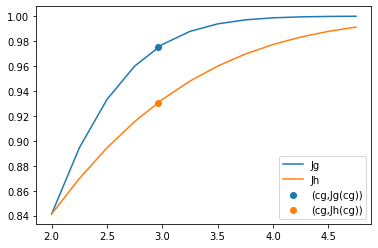

In [56]:
mean=[1,0]
var=[1,2]
J0 = norm(mean[0],var[0])
Jinf = norm(mean[1],var[1])
x = np.arange(2.,5.,.25)
plt.plot(x,J0.cdf(x),label="Jg")
plt.plot(x,Jinf.cdf(x),label="Jh")
plt.scatter(J0.ppf(.975),.975,label="(cg,Jg(cg))")
plt.scatter(J0.ppf(.975),Jinf.cdf(J0.ppf(.975)),label="(cg,Jh(cg))")
plt.legend()

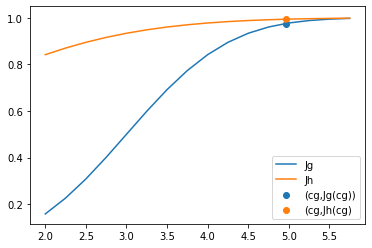

In [55]:
mean=[3,0]
var=[1,2]
J0 = norm(mean[0],var[0])
Jinf = norm(mean[1],var[1])
x = np.arange(2.,6.,.25)
plt.plot(x,J0.cdf(x),label="Jg")
plt.plot(x,Jinf.cdf(x),label="Jh")
plt.scatter(J0.ppf(.975),.975,label="(cg,Jg(cg))")
plt.scatter(J0.ppf(.975),Jinf.cdf(J0.ppf(.975)),label="(cg,Jh(cg)")
plt.legend()